In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Exploration and Understanding

In [200]:
df = pd.read_csv("/content/laptop.csv")
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [106]:
df.shape

(1303, 13)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [108]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


## 2. Data type change and handling missing values

In [201]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True) # removing unnecessary columns

In [110]:
df.dropna(inplace=True)

In [111]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg','')
df.replace('?',0, inplace=True)
df['Inches']=df['Inches'].astype('float64')


In [112]:
df['Ram']= df['Ram'].astype('int64')
df['Weight']=df['Weight'].astype("float64")

In [113]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


## 3. EDA and Feature Engineering

In [114]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Price', ylabel='Density'>

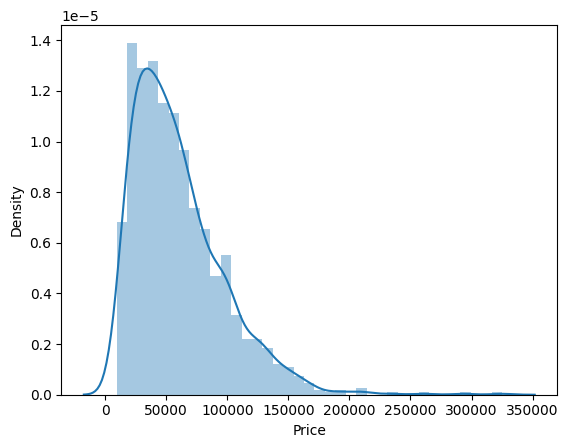

In [115]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

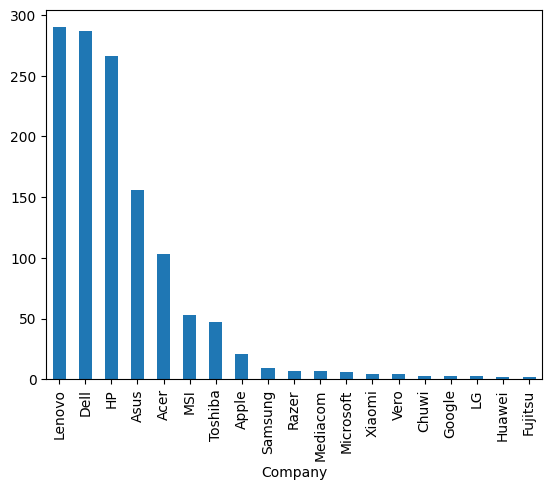

In [116]:
df['Company'].value_counts().plot(kind='bar')

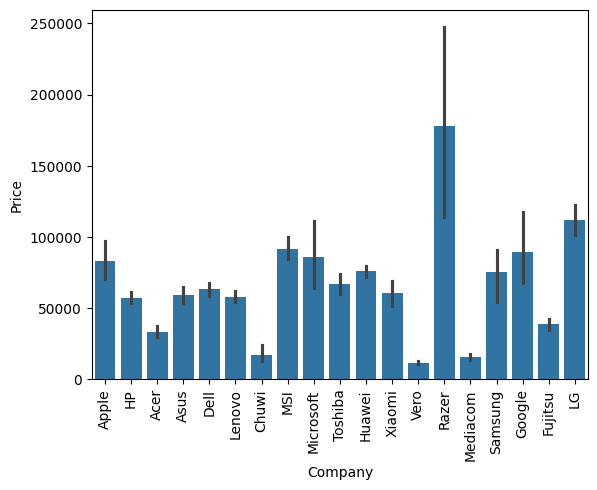

In [117]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

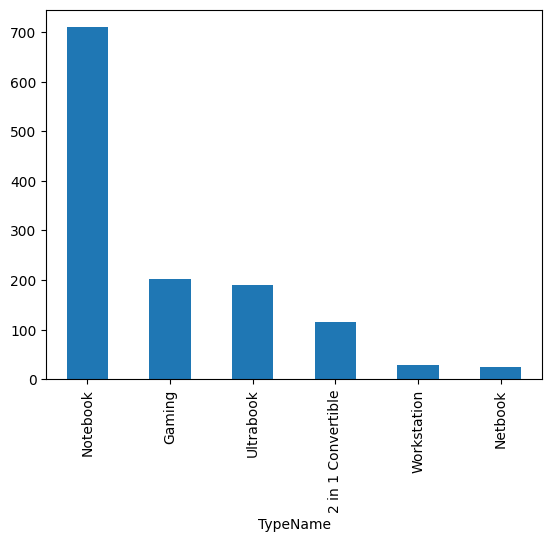

In [118]:
df['TypeName'].value_counts().plot(kind='bar')

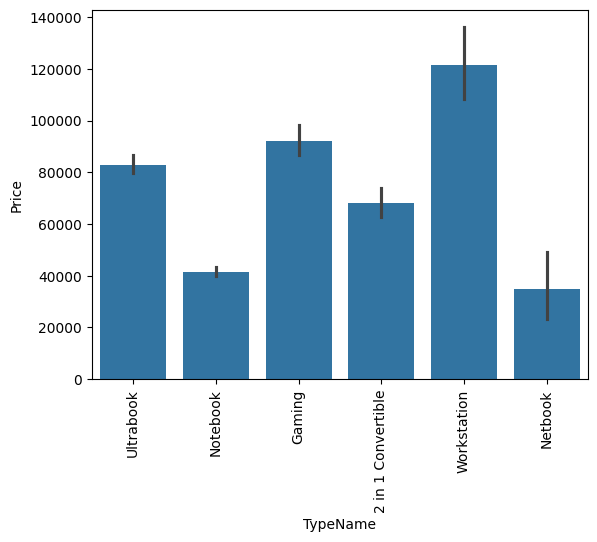

In [119]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

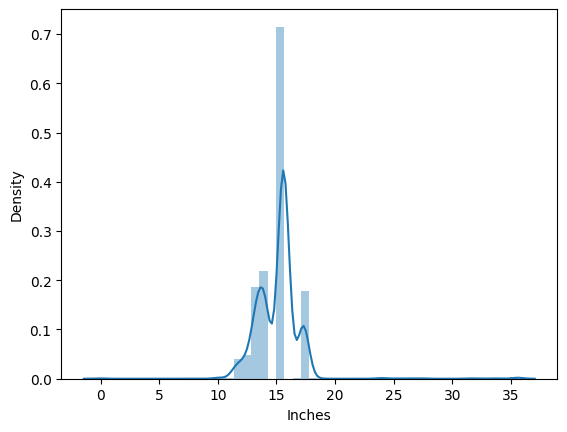

In [120]:
sns.distplot(df['Inches'])

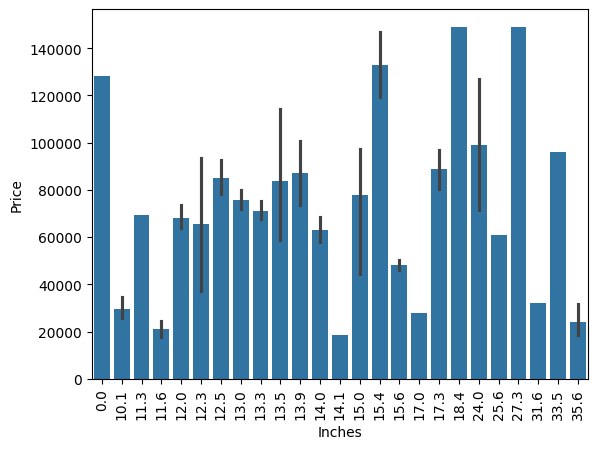

In [121]:
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [122]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [123]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen'>

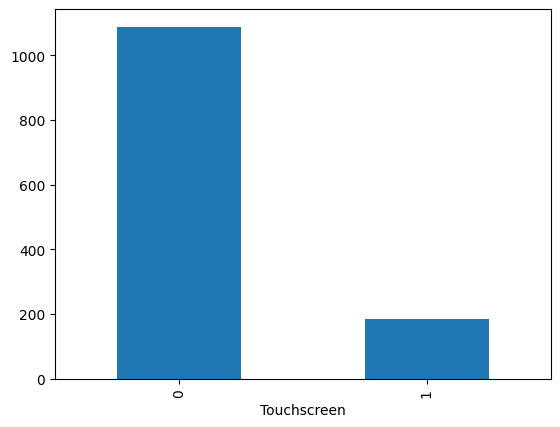

In [124]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

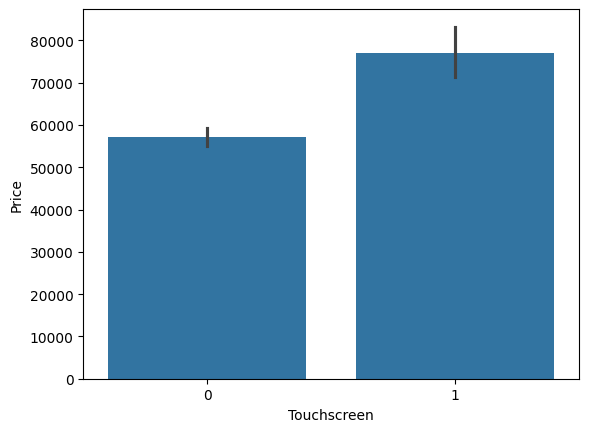

In [125]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

<Axes: xlabel='IPS'>

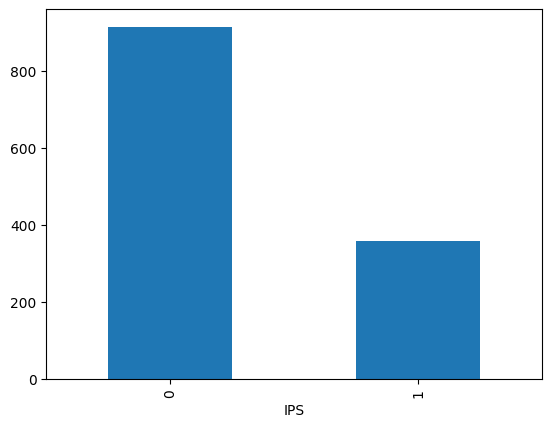

In [126]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)
df['IPS'].value_counts().plot(kind='bar')

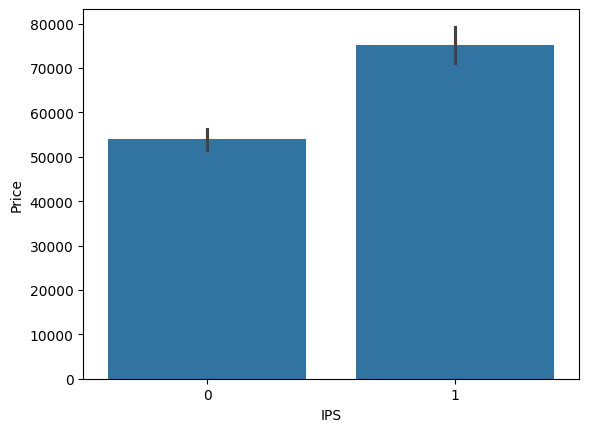

In [127]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.show()

In [128]:
new = df['ScreenResolution'].str.split('x',n=1, expand=True)
df['X_res']=new[0]
df['Y_res']=new[1]
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [129]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [130]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']= df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 159.1+ KB


In [131]:
df['ppi'] = ((df['X_res']**2)+(df['Y_res']**2))*0.5/df['Inches'].astype('float')

In [132]:
df.drop(columns=['ScreenResolution'], inplace= True)

In [133]:
df.drop(columns=['Inches','X_res','Y_res'],inplace =True)

In [134]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i7 2.2GHz,1
AMD A6-Series 7310 2GHz,1


In [135]:
df['Cpu name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name
662,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,28504.80,0,0,155538.461538,Intel Core i5
360,HP,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,23389.92,0,0,78710.897436,Intel Core i3
381,Lenovo,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,No OS,1.85,21498.48,0,0,155538.461538,Intel Core i3


In [136]:
df['Cpu name'].value_counts()

,count
Cpu name,
Intel Core i7,515
Intel Core i5,410
Intel Core i3,134
Intel Celeron Dual,79
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
Intel Celeron Quad,8
AMD A6-Series 9220,8


In [137]:
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

<Axes: xlabel='Cpu Brand'>

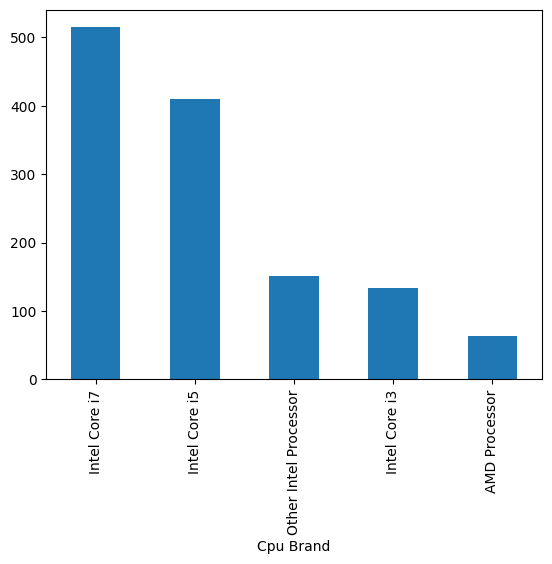

In [138]:
df['Cpu Brand'] = df['Cpu name'].apply(processor)
df['Cpu Brand'].value_counts().plot(kind='bar')

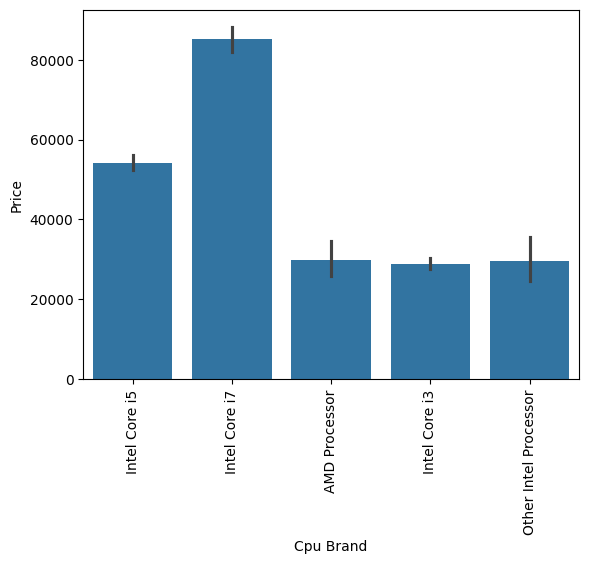

In [139]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [140]:
df.drop(columns=['Cpu','Cpu name'], inplace=True)

<Axes: xlabel='Ram'>

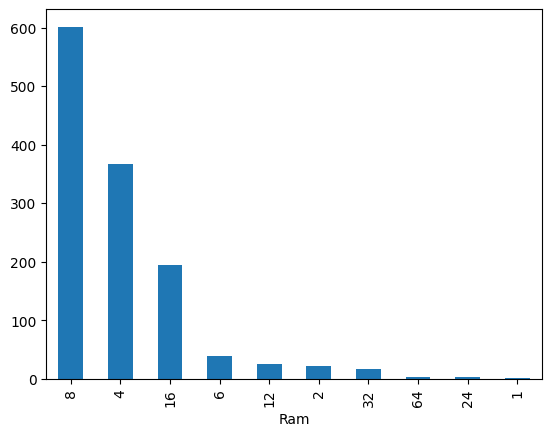

In [141]:
df['Ram'].value_counts().plot(kind = 'bar')

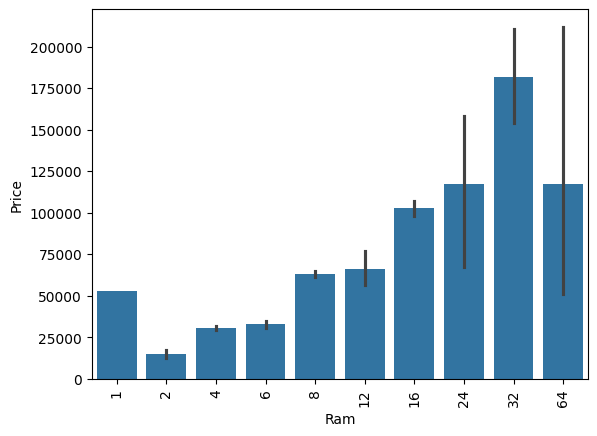

In [142]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [143]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [144]:
# Convert Memory column to string
df['Memory'] = df['Memory'].astype(str)

df['SSD'] = 0
df['HDD'] = 0
df['Hybrid'] = 0
df['Flash_Storage'] = 0

# Function to parse and extract storage amounts with error handling
def update_storage(row):
    ssd, hdd, hybrid, flash_storage = 0, 0, 0, 0

    # Split the memory string by " + "
    parts = row.split(' + ')

    for part in parts:
        try:
            # Determine the storage type and update corresponding variable
            if 'SSD' in part:
                ssd += int(part.replace('GB', '').replace('TB', '000').replace('SSD', '').strip())
            elif 'HDD' in part:
                hdd += int(part.replace('GB', '').replace('TB', '000').replace('HDD', '').strip())
            elif 'Hybrid' in part:
                hybrid += int(part.replace('GB', '').replace('TB', '000').replace('Hybrid', '').strip())
            elif 'Flash Storage' in part:
                flash_storage += int(part.replace('GB', '').replace('TB', '000').replace('Flash Storage', '').strip())
        except ValueError:
            # In case of an error, continue without updating the storage values
            continue

    return pd.Series([ssd, hdd, hybrid, flash_storage])

# Apply the function to the Memory column
df[['SSD', 'HDD', 'Hybrid', 'Flash_Storage']] = df['Memory'].apply(update_storage)


In [145]:
df.drop(columns=['Memory'],inplace= True)

In [146]:
num_df = df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
corr_matrix['Price']

,Price
Ram,0.685648
Weight,0.174525
Price,1.000000
Touchscreen,0.188994
IPS,0.254851
ppi,0.479209
SSD,0.668416
HDD,-0.094405
Hybrid,-0.004936
Flash_Storage,-0.038332


In [147]:
df.drop(columns=['Flash_Storage', 'Hybrid'],inplace= True) # as they have negative correlation with price

In [148]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [149]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [150]:
df['Gpu Brand'].value_counts()

,count
Gpu Brand,
Intel,703
Nvidia,393
AMD,176
ARM,1


In [151]:
df = df[df['Gpu Brand'] != 'ARM']

<Axes: xlabel='Gpu Brand'>

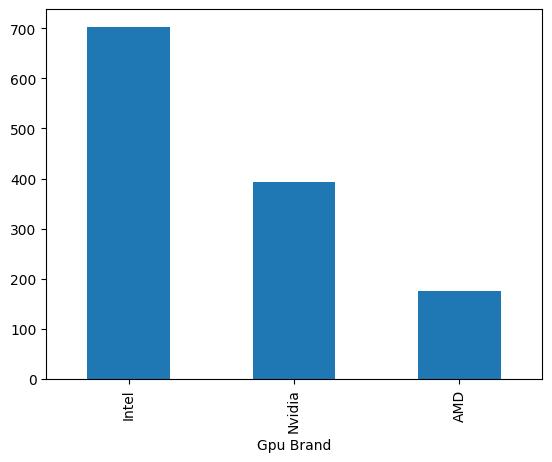

In [152]:
df['Gpu Brand'].value_counts().plot(kind = 'bar')

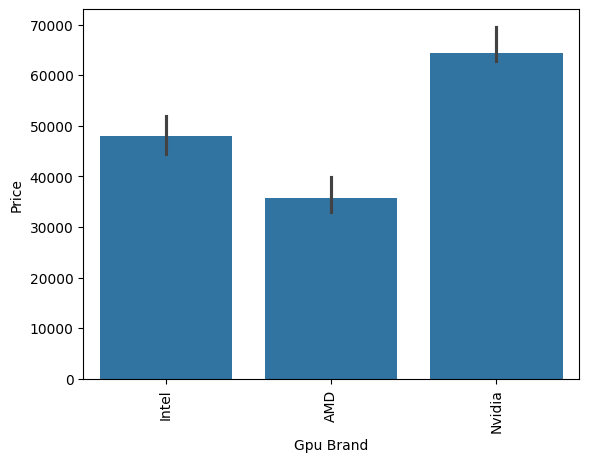

In [153]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'],estimator=np.median)
plt.xticks(rotation= 'vertical')
plt.show()

In [154]:
df.drop(columns=['Gpu'], inplace = True)

In [155]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


In [157]:
def system(cate): # Creating 3 operating system to avoiad complexity
    if cate == 'Windows 10' or cate == 'Windows 7' or cate == 'Windows 10 S':
        return 'Windows'
    elif cate == 'MacOs' or cate == 'Mac OS X':
        return 'MAC'
    else:
        return 'Other/No OS/Linux'

In [158]:
df['System'] = df['OpSys'].apply(system)

In [159]:
df.drop(columns=['OpSys'], inplace = True)
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,System
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,342616.541353,Intel Core i5,128,0,Intel,Other/No OS/Linux
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,108406.015038,Intel Core i5,0,0,Intel,Other/No OS/Linux
2,HP,Notebook,8,1.86,30636.0000,0,0,155538.461538,Intel Core i5,256,0,Intel,Other/No OS/Linux


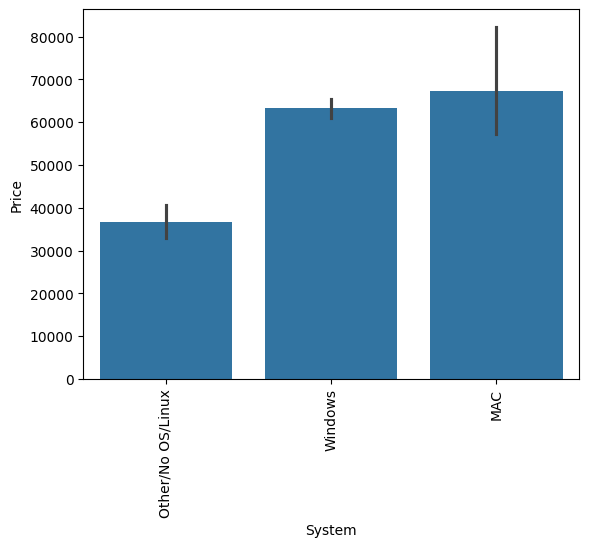

In [160]:
sns.barplot(x=df['System'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='Weight'>

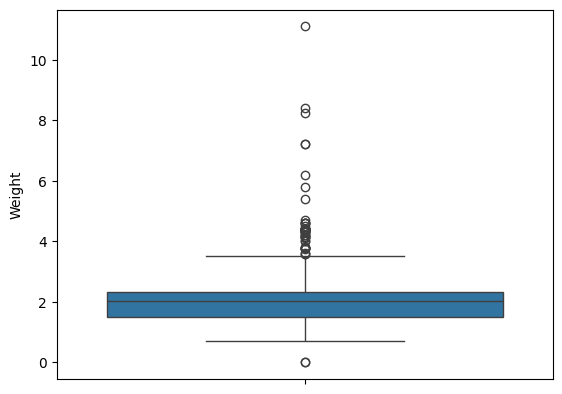

In [161]:
sns.boxplot(df['Weight'])

In [162]:
# Capping/flooring outliers
def cap_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data.clip(lower_bound, upper_bound)

# Apply capping/flooring
df['Weight'] = cap_outliers(df['Weight'])


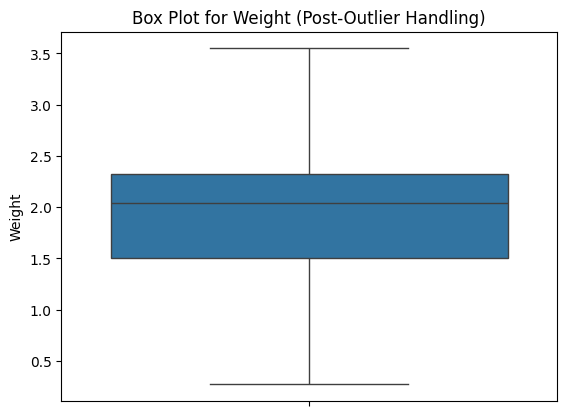

In [163]:
sns.boxplot(df['Weight'])
plt.title("Box Plot for Weight (Post-Outlier Handling)")
plt.show()


<Axes: xlabel='Weight', ylabel='Price'>

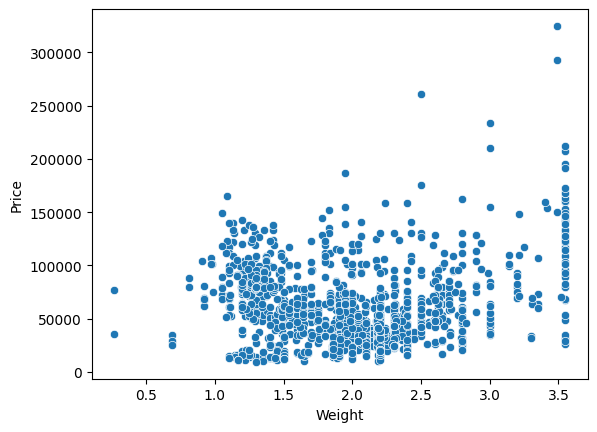

In [164]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: >

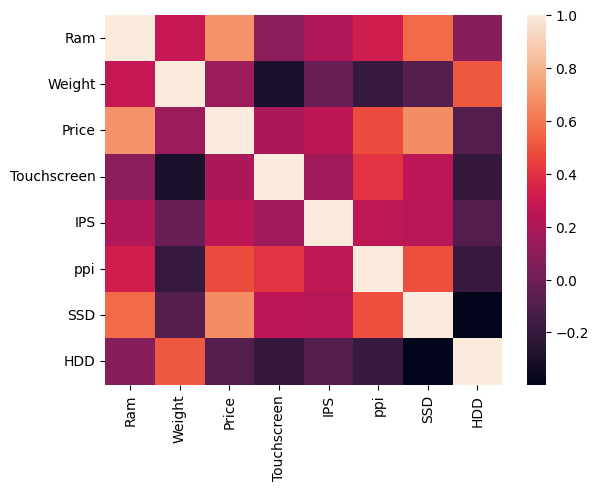

In [165]:
num_df = df.select_dtypes(include=[np.number]) # Understanding correlation between variables
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix)

<Axes: xlabel='Price', ylabel='Density'>

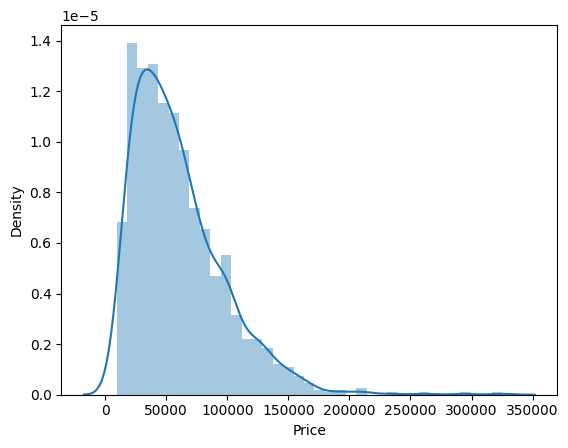

In [166]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

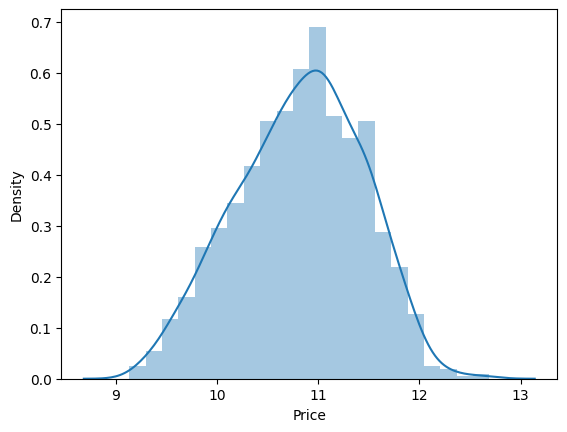

In [167]:
sns.distplot(np.log(df['Price'])) # normalization of price using log

In [168]:
# converting categorical varibles to numerical
df=pd.get_dummies(df,columns=["Company","TypeName","Cpu Brand","Gpu Brand", "System"],drop_first=True, dtype=np.int64)

In [169]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [170]:
X.head(3)

,Ram,Weight,Touchscreen,IPS,ppi,SSD,HDD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor,Gpu Brand_Intel,Gpu Brand_Nvidia,System_Other/No OS/Linux,System_Windows
0,8,1.37,0,1,342616.541353,128,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
1,8,1.34,0,0,108406.015038,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
2,8,1.86,0,0,155538.461538,256,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [171]:
y.head(3)

,Price
0,11.175755
1,10.776777
2,10.329931


In [173]:
# split the dataset into train and test # hold out method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [175]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [176]:
# Replace infinite values with NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values from X_test and y_test
# Get the indices of rows with NaN values in X_test
nan_indices = X_test[X_test.isnull().any(axis=1)].index

# Remove those indices from both X_test and y_test
X_test = X_test.dropna(inplace=False)  # Remove inplace=True to avoid modifying the original DataFrame
y_test = y_test.drop(nan_indices)

# Identify columns with non-numeric data
non_numeric_cols = X_test.select_dtypes(exclude=np.number).columns

# Convert only numeric columns to float64
numeric_cols = X_test.select_dtypes(include=np.number).columns
X_test[numeric_cols] = X_test[numeric_cols].astype(np.float64)


## Decision Tree Regressor

In [177]:
# let's train the model and test
# for tarining - X_train,y_train
# for testing - X_test for testing which gives us y_pred
# evaluation - y_test,y_pred

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [178]:
# testing
y_pred=dt.predict(X_test)

In [179]:
# Evaluation
print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.8306312358124044
MSE 0.0707622913576347


## Linear Regression

In [185]:
# let's train the model and test
# for tarining - X_train,y_train
# for testing - X_test for testing which gives us y_pred
# evaluation - y_test,y_pred
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [186]:
# testing
y_pred1=lr.predict(X_test)

In [187]:
# Evaluation
print('R2_score',r2_score(y_test,y_pred1))
print('MSE',mean_squared_error(y_test,y_pred1))

R2_score 0.8351195893943877
MSE 0.06888705665655015


## Random Forest

In [188]:
# let's train the model and test
# for tarining - X_train,y_train
# for testing - X_test for testing which gives us y_pred
# evaluation - y_test,y_pred
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [189]:
# Testing
y_pred2 = rf.predict(X_test)

In [190]:
# Evaluation
print('R2_score',r2_score(y_test,y_pred2))
print('MSE',mean_squared_error(y_test,y_pred2))

R2_score 0.9088780569488278
MSE 0.03807075947084867


## Gradient Boosting Regressor

In [191]:
# let's train the model and test
# for tarining - X_train,y_train
# for testing - X_test for testing which gives us y_pred
# evaluation - y_test,y_pred
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [192]:
# Testing
y_pred3 = gb.predict(X_test)

In [193]:
# Evaluation
print('R2_score',r2_score(y_test,y_pred3))
print('MSE',mean_squared_error(y_test,y_pred3))

R2_score 0.8831813495655896
MSE 0.04880684710487396


## XGBoost Regressor

In [194]:
# let's train the model and test
# for tarining - X_train,y_train
# for testing - X_test for testing which gives us y_pred
# evaluation - y_test,y_pred
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [195]:
# Testing
y_pred4 = gb.predict(X_test)

In [196]:
# Evaluation
print('R2_score',r2_score(y_test,y_pred4))
print('MSE',mean_squared_error(y_test,y_pred4))

R2_score 0.8831813495655896
MSE 0.04880684710487396


## Best Model Selection

In [197]:
r2_score = [83, 82, 90, 88, 88]
MSE = [0.06, 0.07, 0.03, 0.05, 0.04]
models = ['LinearRegressor', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
performance=pd.DataFrame({'r2_score':r2_score}, index=models)
performance

,r2_score
LinearRegressor,83
Decision Tree,82
Random Forest,90
Gradient Boosting,88
XGBoost,88


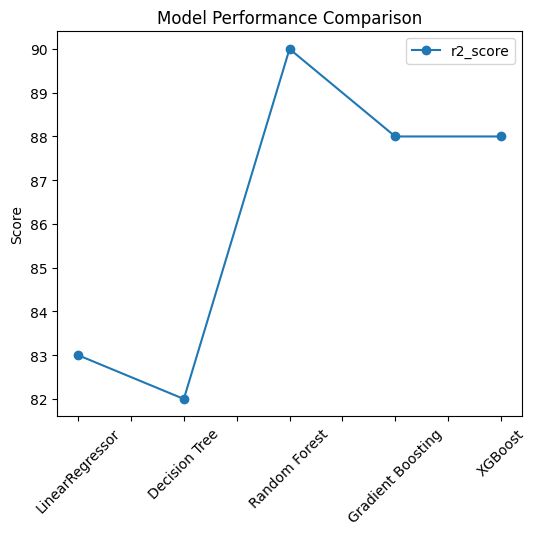

In [198]:
performance.plot(kind='line',marker= 'o', figsize=(6, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

## Hypertunning of Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Method of selecting samples for training each tree
}

# Initialize the Random Forest Regressor
rf1 = RandomForestRegressor(random_state=42)

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [97]:
# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Best estimator (model) from grid search
best_rf = grid_search.best_estimator_

# Now you can use best_rf to make predictions or evaluate it on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model (for example, using Mean Squared Error and R² Score)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R² Score
r2score = r2_score(y_test, y_pred)
print("R² Score on test set: ", r2score)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse)


Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R² Score on test set:  0.9079430724467344
Mean Squared Error on test set:  0.03846139611550601


In [47]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [100]:
import gradio as gr
def predict_laptop_price(brand, typename, ram, weight, ppi, touchscreen, IPS, ssd, hdd, cpu_brand, gpu_brand, system):
    if not brand:
        brand = "Unknown"
    if not typename:
        typename = "Unknown"
    if not ram:
        ram = 4
    if not weight:
        weight = 1.5
    if not ppi:
        ppi = 100
    if not touchscreen:
        touchscreen = "No"  # Default value if missing
    if not IPS:
        IPS = "No"  # Default value if missing
    if not ssd:
        ssd = 0
    if not hdd:
        hdd = 0
    if not cpu_brand:
        cpu_brand = "Other Intel Processor"
    if not gpu_brand:
        gpu_brand = "Intel"
    if not system:
        system = "Windows"

    input_data = pd.DataFrame({
        'Company': [brand],
        'TypeName': [typename],
        'Ram': [ram],
        'Weight': [weight],
        'Touchscreen': [1 if touchscreen == "Yes" else 0],  # Convert to numeric
        'IPS': [1 if IPS == "Yes" else 0],  # Convert to numeric
        'SSD': [ssd],
        'HDD': [hdd],
        'ppi': [ppi],
        'Cpu Brand': [cpu_brand],
        'Gpu Brand': [gpu_brand],
        'System': [system]
    })

    # Apply the same preprocessing as done during training
    input_data = pd.get_dummies(input_data, drop_first=True)

    # Align the input data with the training data
    missing_cols = set(X_train.columns) - set(input_data.columns)
    for c in missing_cols:
        input_data[c] = 0
    input_data = input_data[X_train.columns]

    # Make the prediction
    prediction = best_rf.predict(input_data)

    # Return the predicted price
    return f"{np.exp(prediction)[0]:.2f}"  # Assuming the model was trained on log-transformed prices

In [101]:
# Define the Gradio interface
interface = gr.Interface(
    fn=predict_laptop_price,
    inputs=[
        gr.Dropdown(['Apple', 'Dell', 'HP', 'Lenovo', 'Acer', 'Asus'], label="Brand"),
        gr.Dropdown(['Ultrabook', 'Gaming', 'Notebook', '2 in 1 Convertible'], label="Type"),
        gr.Dropdown(label="RAM (GB)", choices=[2, 4, 8, 12, 16, 32]),
        gr.Number(label="Weight (kg)"),
        gr.Number(label="ppi"),
        gr.Radio(["Yes", "No"], label="Touchscreen"),
        gr.Radio(["Yes", "No"], label="IPS"),
        gr.Dropdown(label="SSD (GB)", choices=[0, 128, 512, 1000]),
        gr.Dropdown(label="HDD (GB)", choices=[0, 128, 512, 1000]),
        gr.Dropdown(['Windows', 'Mac', 'Others/No OS/Linux'], label="System"),
        gr.Dropdown(['Intel Core i7', 'Intel Core i5', 'Intel Core i3', 'AMD Processor', 'Other Intel Processor'], label="CPU Brand"),
        gr.Dropdown(['Nvidia', 'AMD', 'Intel'], label="GPU Brand")
    ],
    outputs="text",
    title="Laptop Price Prediction",
    description="Predict the price of a laptop based on its features using a trained Random Forest model."
)

# Launch the Gradio app
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://94031954a7beaedd38.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
